In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

c:\Users\sofik\Documents\Uni Konstanz\SEDS\Thesis\master-thesis\checklist


Load results, merge with the diversity score of each subsample


In [30]:
results_df  = pd.read_csv("data/results.csv")
results_df  = results_df.drop_duplicates()

div_topic_df = pd.read_csv("../data/subsamples/div_annomatic_topic.csv")
div_source_df = pd.read_csv("../data/subsamples/div_annomatic_source.csv")

results_df['dimension'] = results_df['model'].str.extract(r'annomatic_(\w+)_subsamples')
results_df['model'] = results_df['model'].str.replace(r'.*alpha_', 'alpha_', regex=True)

# Merge results with topic and source diversity data
div_topic_df['dimension'] = 'topic'
div_source_df['dimension'] = 'source'

div_topic_df.rename(columns={'subsample': 'model'}, inplace=True)
div_source_df.rename(columns={'subsample': 'model'}, inplace=True)

diversity_df = pd.concat([div_topic_df, div_source_df], ignore_index=True)

merged_df = pd.merge(
    results_df,
    diversity_df,
    on=['model', 'dimension'],
    how='inner'
)

         test              model category  MCC  Accuracy dimension  alpha  \
0  LoadedTest  alpha_0_001_idx_1      NaN  0.0  0.799715    source  0.001   
1  LoadedTest  alpha_0_001_idx_2      NaN  0.0  0.769485    source  0.001   
2  LoadedTest  alpha_0_001_idx_3      NaN  0.0  0.736269    source  0.001   
3  LoadedTest  alpha_0_005_idx_1      NaN  0.0  0.622464    source  0.005   
4  LoadedTest  alpha_0_005_idx_2      NaN  0.0  0.543516    source  0.005   

      vs  normalized_vs  
0  1.120        0.01578  
1  1.184        0.01668  
2  1.183        0.01667  
3  1.890        0.02663  
4  2.043        0.02879  


Show metrics by diversity score

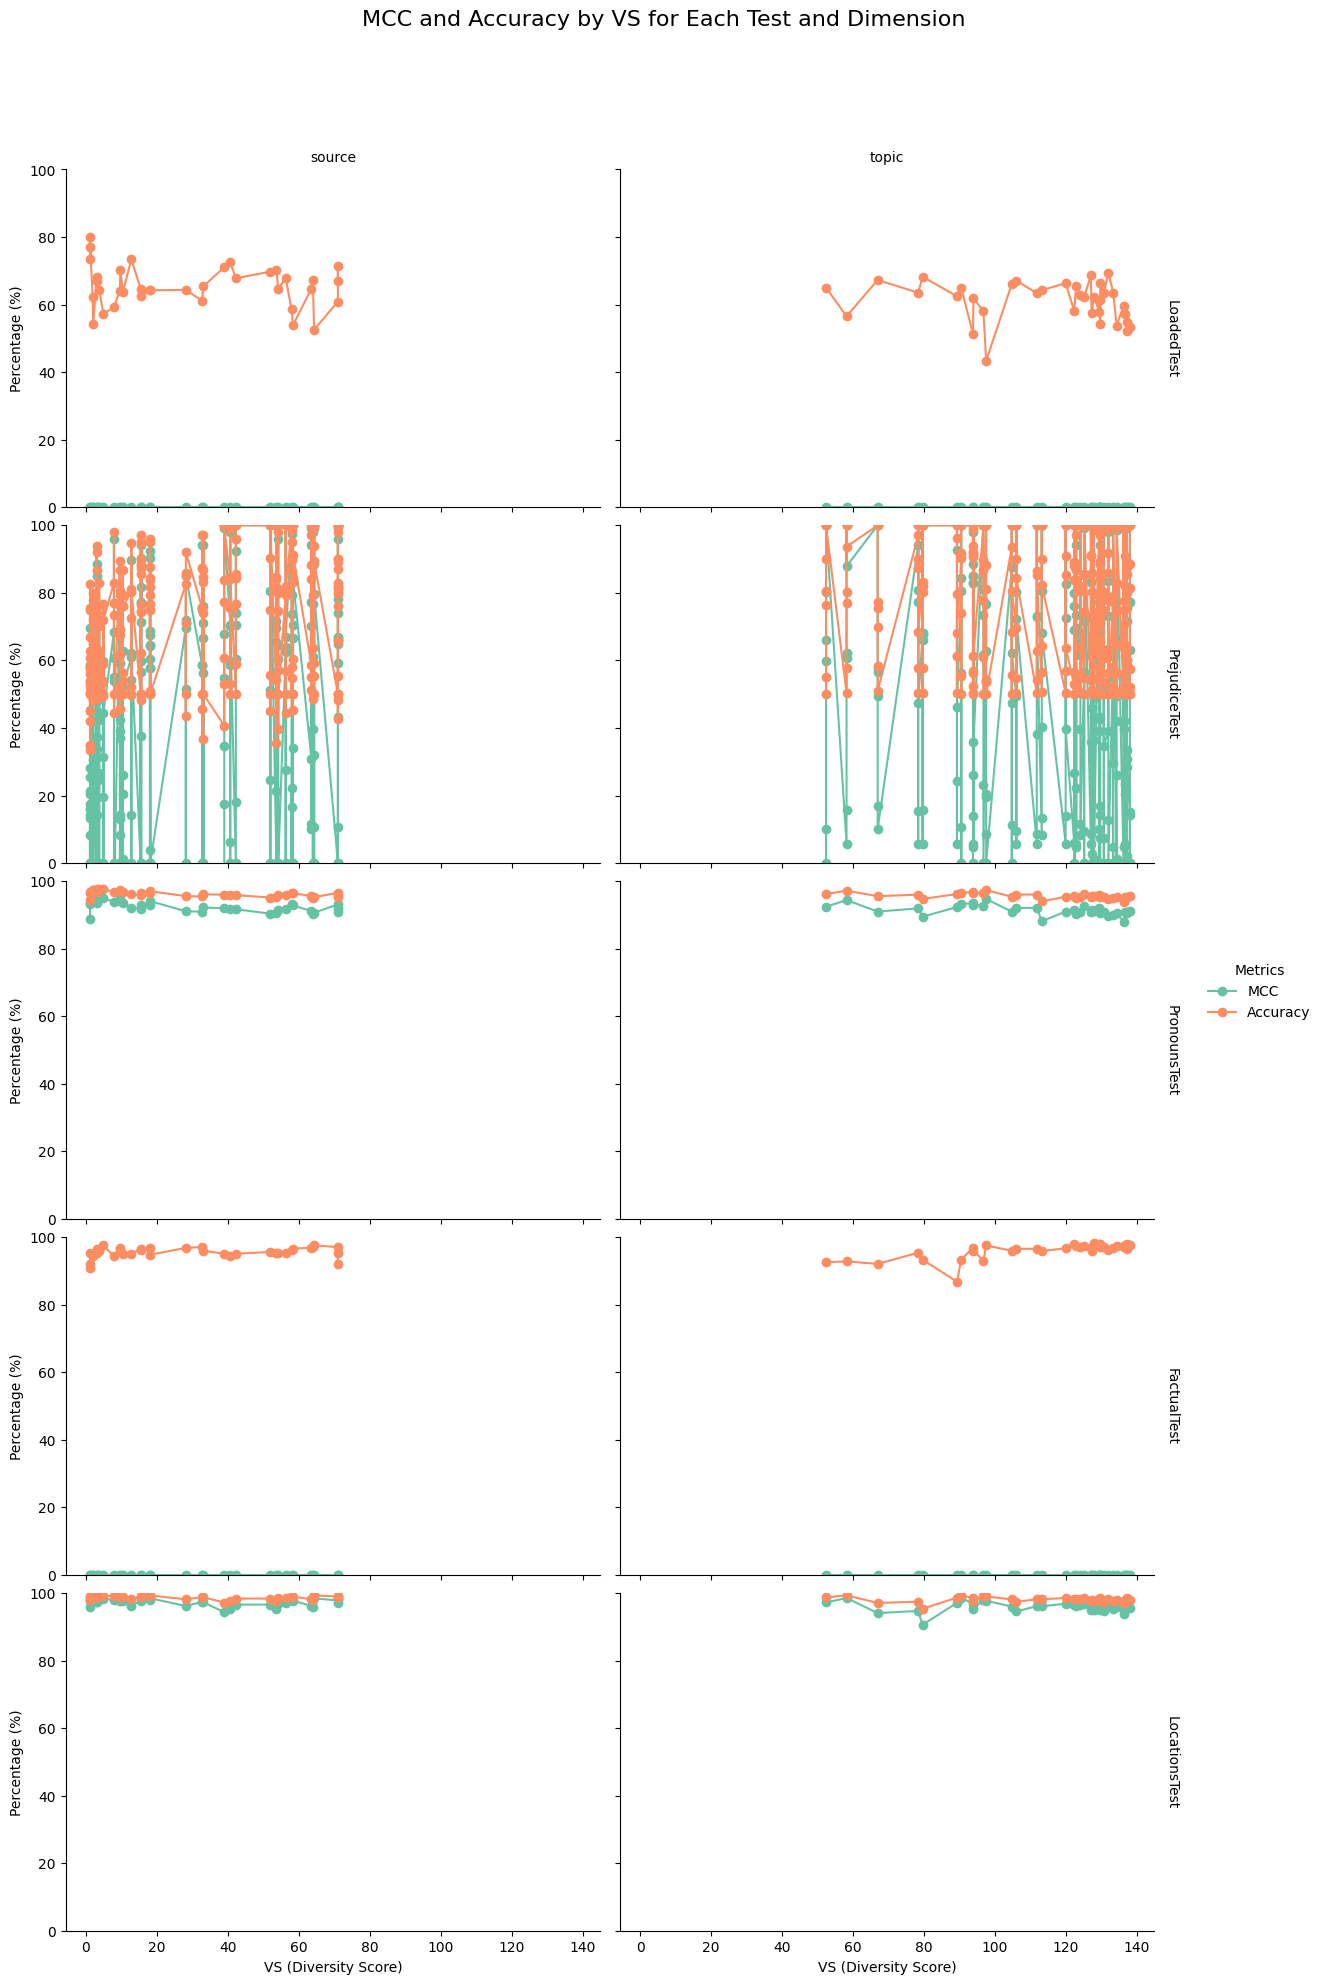

In [53]:
# Sort the DataFrame by `vs`
merged_df = merged_df.sort_values(by='vs')

# Set the color palette
palette = sns.color_palette("Set2", n_colors=2)  # For MCC and Accuracy

# Create a FacetGrid to wrap plots by test and dimension
g = sns.FacetGrid(
    merged_df,
    col="dimension",
    row="test",
    margin_titles=True,
    height=4,
    aspect=1.5
)

# Map plots to the grid
g.map_dataframe(
    lambda data, **kwargs: plt.plot(
        data["vs"],
        data["MCC"] * 100,
        marker='o',
        label='MCC',
        color=palette[0]
    )
)

g.map_dataframe(
    lambda data, **kwargs: plt.plot(
        data["vs"],
        data["Accuracy"] * 100,
        marker='o',
        label='Accuracy',
        color=palette[1]
    )
)

# Add labels and formatting
g.set_axis_labels("VS (Diversity Score)", "Percentage (%)")
g.set_titles(col_template="{col_name}", row_template="{row_name}")
g.set(ylim=(0, 100))
g.add_legend(title="Metrics")

# Adjust layout
plt.subplots_adjust(top=0.9)
g.fig.suptitle("MCC and Accuracy by VS for Each Test and Dimension", fontsize=16)
plt.show()


Show results for each Prejudice category, for source dimension

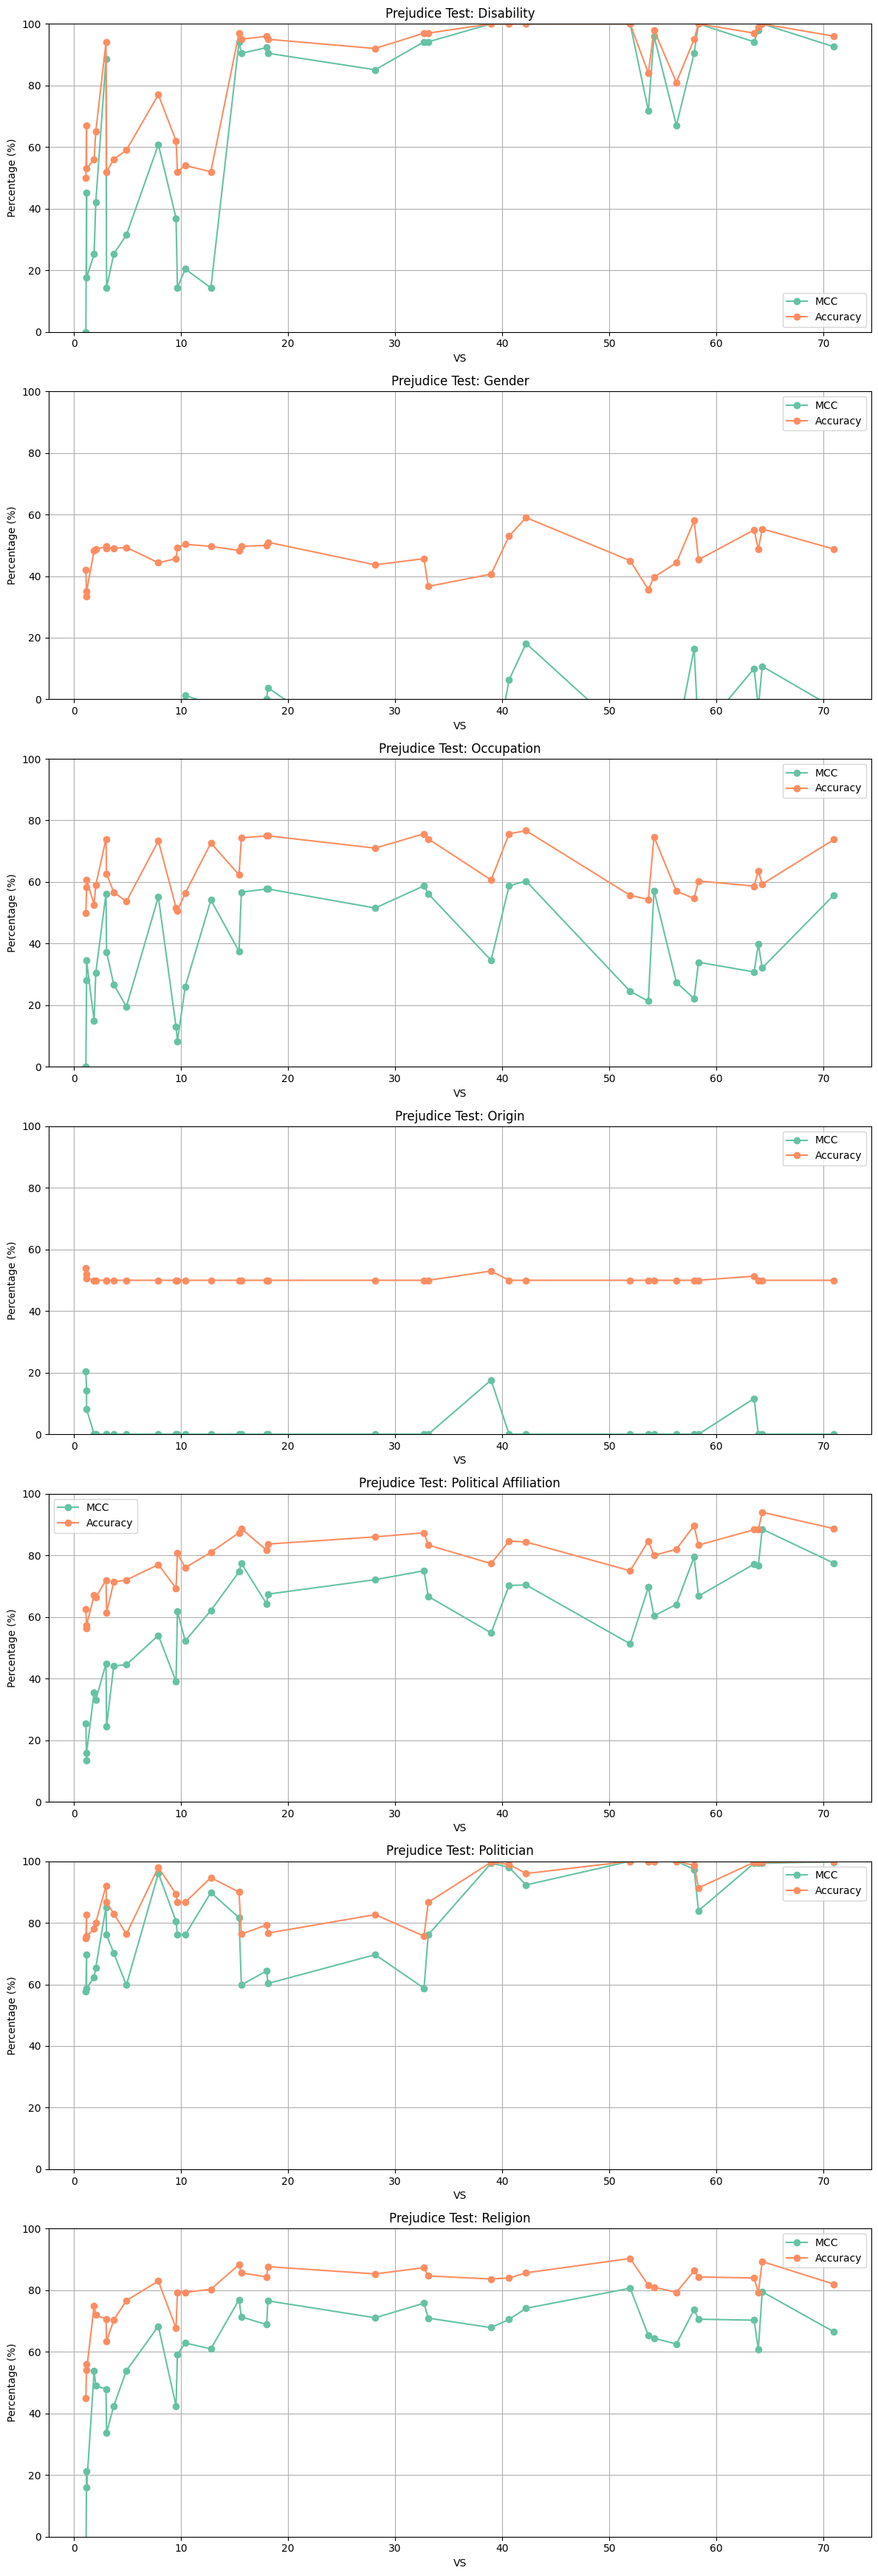

In [54]:
# Filter the DataFrame for PrejudiceTest and source dimension
source_prejudice_df = merged_df[
    (merged_df['test'] == 'PrejudiceTest') & (merged_df['dimension'] == 'source')
]

# Extract category and group by category and vs
grouped_source_prejudice = source_prejudice_df.groupby(['category', 'vs']).agg({
    'MCC': 'mean',
    'Accuracy': 'mean'
}).reset_index()

# Set the color palette
palette = sns.color_palette("Set2", n_colors=2)

# Plot for each category in the source dimension
plt.figure(figsize=(12, len(grouped_source_prejudice['category'].unique()) * 5))

for idx, category in enumerate(grouped_source_prejudice['category'].unique(), start=1):
    subset = grouped_source_prejudice[grouped_source_prejudice['category'] == category]

    if subset.empty:
        continue

    # Sort subset by vs to ensure smooth plotting
    subset = subset.sort_values(by='vs')

    # Create subplot for each category
    plt.subplot(len(grouped_source_prejudice['category'].unique()), 1, idx)

    # Plot both MCC and Accuracy
    plt.plot(subset['vs'], subset['MCC'] * 100, marker='o', label='MCC', color=palette[0])
    plt.plot(subset['vs'], subset['Accuracy'] * 100, marker='o', label='Accuracy', color=palette[1])

    plt.xlabel('VS')
    plt.ylabel('Percentage (%)')
    plt.ylim(0, 100)  # Set y-axis from 0 to 100
    plt.title(f'Prejudice Test: {category}')
    plt.grid()
    plt.legend()

# Adjust layout for readability
plt.tight_layout()
plt.show()


It appears to be a relationship 

Check each Prejudice category, for topic subsamples

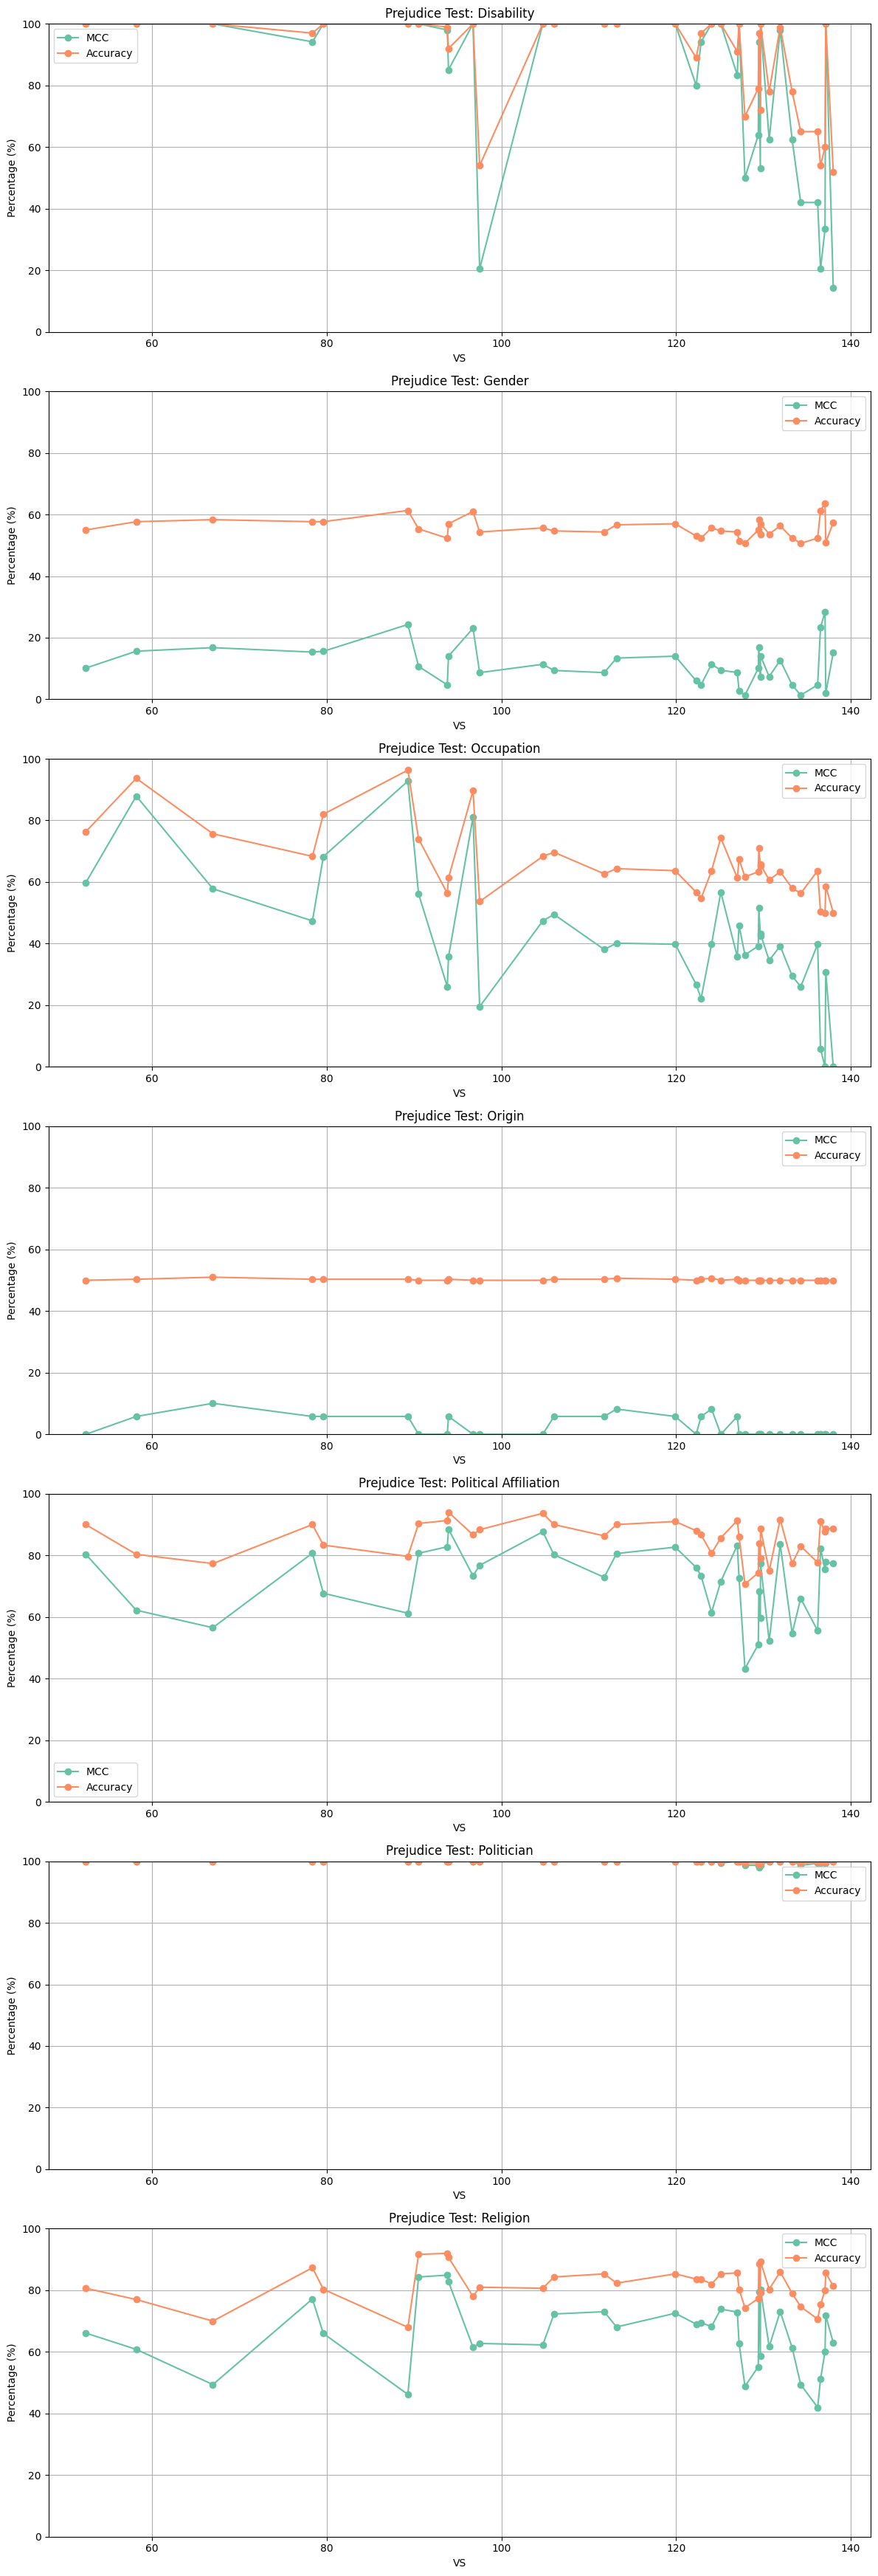

In [55]:
# Filter the DataFrame for PrejudiceTest and topic dimension
topic_prejudice_df = merged_df[
    (merged_df['test'] == 'PrejudiceTest') & (merged_df['dimension'] == 'topic')
]

# Extract category and group by category and vs
grouped_topic_prejudice = topic_prejudice_df.groupby(['category', 'vs']).agg({
    'MCC': 'mean',
    'Accuracy': 'mean'
}).reset_index()

# Set the color palette
palette = sns.color_palette("Set2", n_colors=2)

# Plot for each category in the topic dimension
plt.figure(figsize=(12, len(grouped_topic_prejudice['category'].unique()) * 5))

for idx, category in enumerate(grouped_topic_prejudice['category'].unique(), start=1):
    subset = grouped_topic_prejudice[grouped_topic_prejudice['category'] == category]

    if subset.empty:
        continue

    # Sort subset by vs to ensure smooth plotting
    subset = subset.sort_values(by='vs')

    # Create subplot for each category
    plt.subplot(len(grouped_topic_prejudice['category'].unique()), 1, idx)

    # Plot both MCC and Accuracy
    plt.plot(subset['vs'], subset['MCC'] * 100, marker='o', label='MCC', color=palette[0])
    plt.plot(subset['vs'], subset['Accuracy'] * 100, marker='o', label='Accuracy', color=palette[1])

    plt.xlabel('VS')
    plt.ylabel('Percentage (%)')
    plt.ylim(0, 100)  # Set y-axis from 0 to 100
    plt.title(f'Prejudice Test: {category}')
    plt.grid()
    plt.legend()

# Adjust layout for readability
plt.tight_layout()
plt.show()

Explore Prejudice in more detail - metrics for each minority category

In [75]:
df_pt = pd.read_csv("data/results_pt.csv")
df_pt = df_pt .drop_duplicates()

df_pt ['dimension'] = df_pt['model'].str.extract(r'annomatic_(\w+)_subsamples')
df_pt['model'] = df_pt['model'].str.replace(r'.*alpha_', 'alpha_', regex=True)

df = pd.merge(
    df_pt,
    diversity_df,
    on=['model', 'dimension'],
    how='inner'
)

df.head(5)

,test,model,category,category_minority,MCC,F1,Accuracy,dimension,alpha,vs,normalized_vs
0,PrejudiceTest,alpha_0_001_idx_1,Politician,Conservatives,0.577350,0.666667,0.75,source,0.001,1.12,0.01578
1,PrejudiceTest,alpha_0_001_idx_1,Politician,Liberals,0.577350,0.666667,0.75,source,0.001,1.12,0.01578
2,PrejudiceTest,alpha_0_001_idx_1,Politician,Socialists,0.577350,0.666667,0.75,source,0.001,1.12,0.01578
3,PrejudiceTest,alpha_0_001_idx_1,Gender,Male,-0.369274,0.000000,0.38,source,0.001,1.12,0.01578
4,PrejudiceTest,alpha_0_001_idx_1,Gender,Female,-0.294884,0.000000,0.42,source,0.001,1.12,0.01578


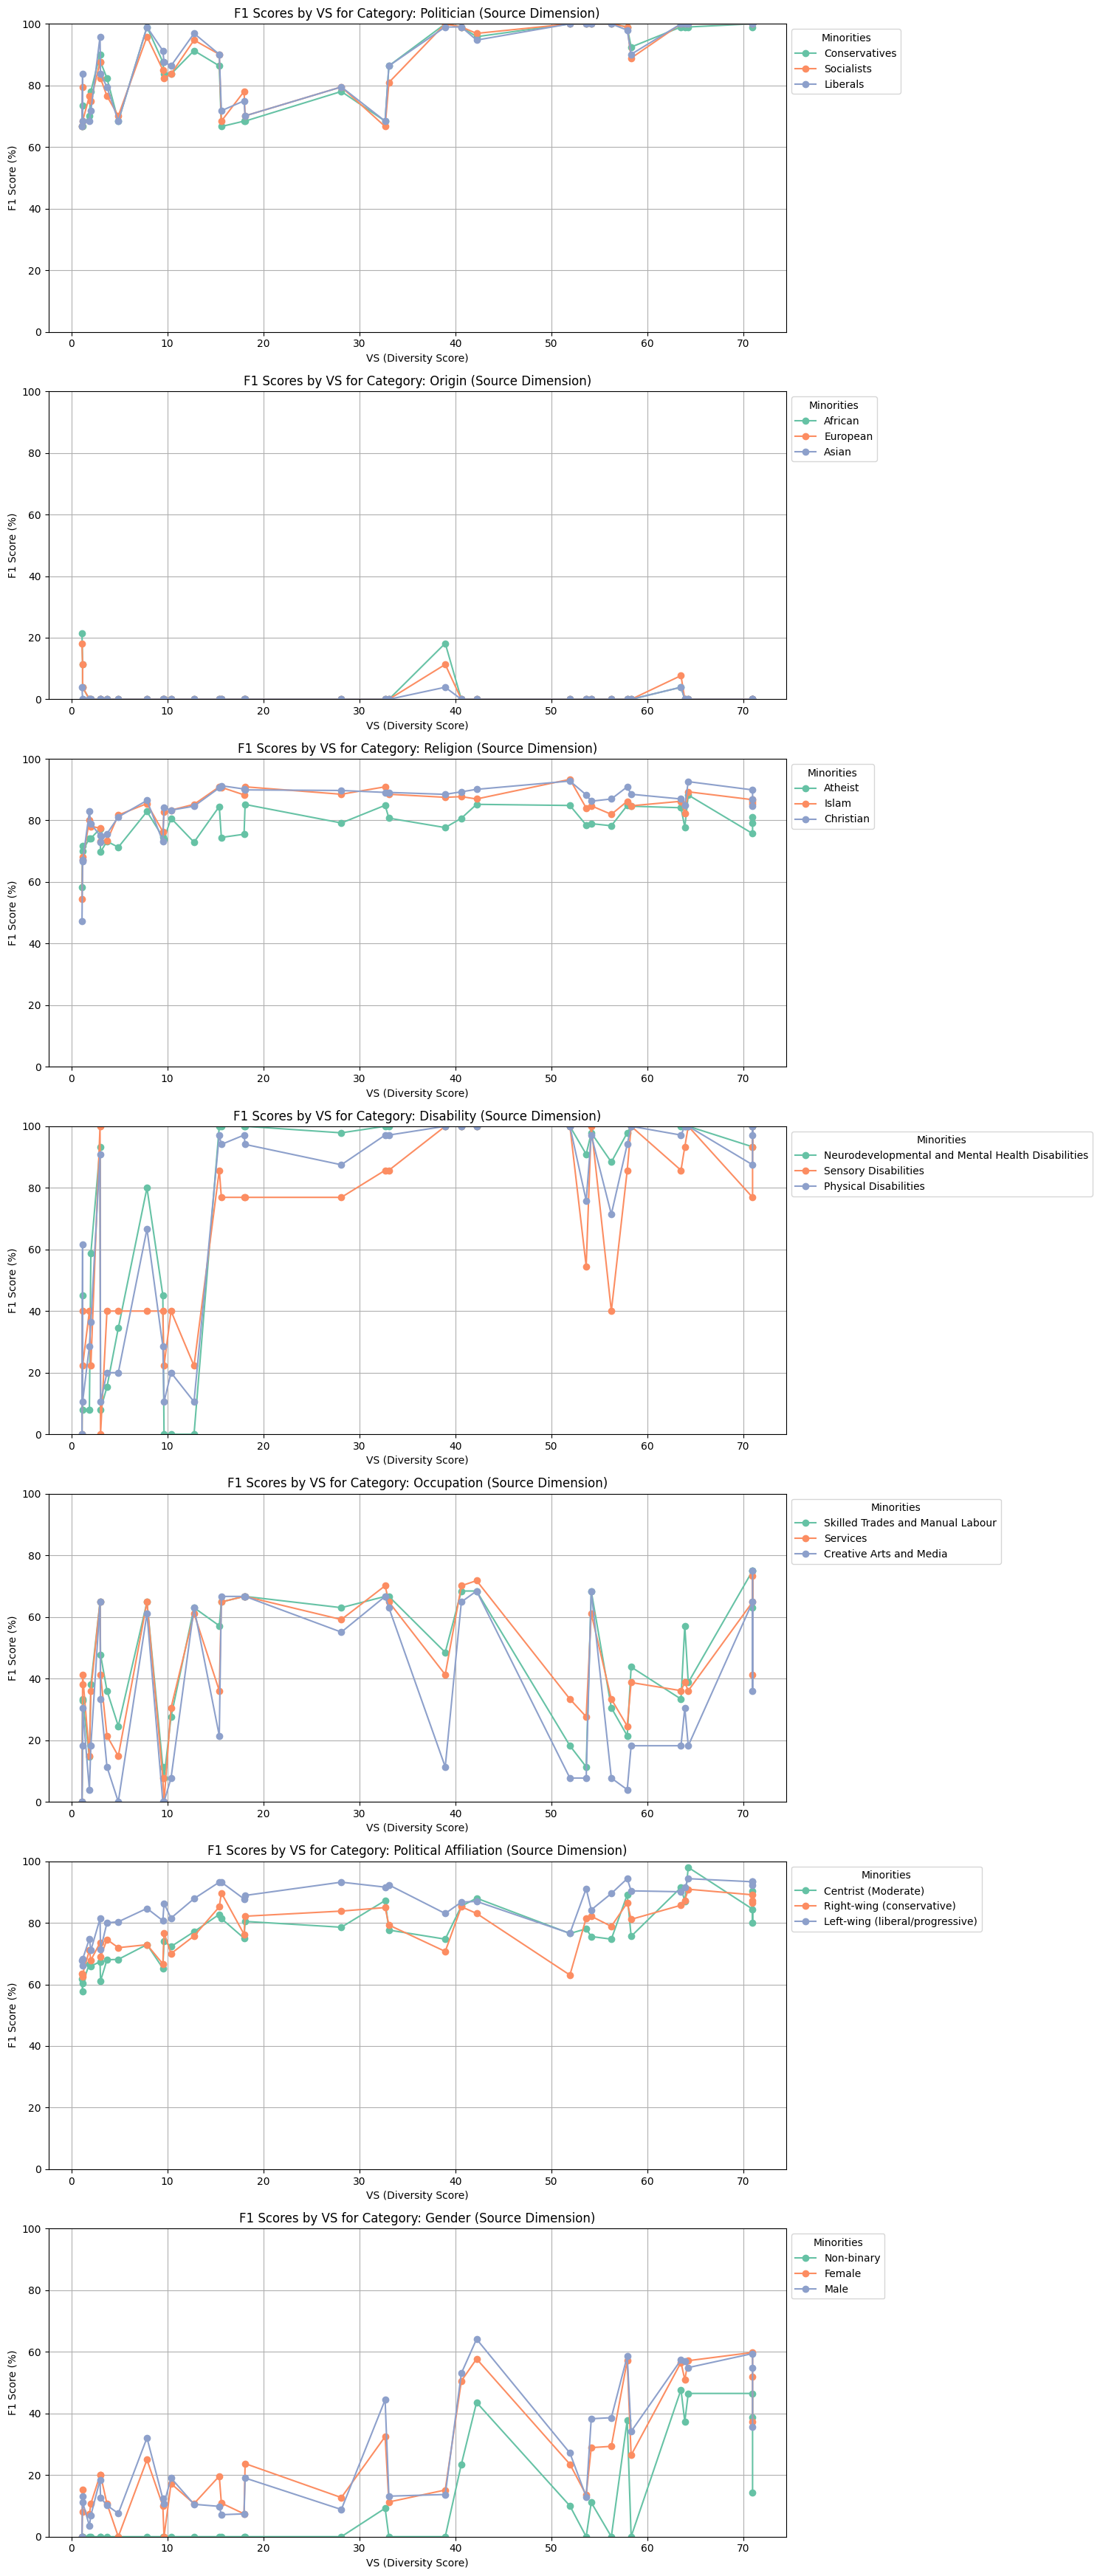

In [52]:

# Filter data for the source dimension
source_df = df[df['dimension'] == 'source']

# Sort by 'vs' to ensure proper plotting
source_df = source_df.sort_values(by='vs')

# Get unique categories in the source dimension
categories = source_df['category'].unique()

# Set the color palette
palette = sns.color_palette("Set2", len(source_df['category_minority'].unique()))

# Plot results
plt.figure(figsize=(15, len(categories) * 5))  # Adjust figure size based on the number of categories

for idx, category in enumerate(categories):
    subset = source_df[source_df['category'] == category]

    plt.subplot(len(categories), 1, idx + 1)  # Create a subplot for each category
    for minority_idx, minority in enumerate(subset['category_minority'].unique()):
        minority_data = subset[subset['category_minority'] == minority]
        plt.plot(
            minority_data['vs'], 
            minority_data['F1'] * 100, 
            marker='o', 
            label=f'{minority}', 
            color=palette[minority_idx]  # Use Set2 colors
        )

    plt.title(f"F1 Scores by VS for Category: {category} (Source Dimension)")
    plt.xlabel("VS (Diversity Score)")
    plt.ylabel("F1 Score (%)")
    plt.ylim(0, 100)  # Ensure y-axis is consistent
    plt.legend(title='Minorities', loc='upper left', bbox_to_anchor=(1, 1))  # Add a legend
    plt.grid()

plt.tight_layout()
plt.show()


Fairness/Bias

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import pearsonr, spearmanr
# from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

def regression_vs_metric(df, metric):
    """
    Performs a linear regression of a performance metric on diversity scores.

    Args:
        df (pd.DataFrame): DataFrame containing metrics and diversity scores.
        metric (str): Metric to be regressed (e.g., 'mcc', 'f1').
    """
    X = df['vs']
    y = df[metric]

    # Add constant for regression intercept
    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()
    print(f"\nRegression Results for {metric}:\n")
    print(model.summary())


def calculate_correlations(df):
    """
    Calculates Pearson and Spearman correlations between metrics and diversity scores.

    Args:
        df (pd.DataFrame): DataFrame containing metrics and diversity scores.

    Returns:
        pd.DataFrame: Correlation results for each metric.
    """
    results = []
    performance_metrics = ['mcc', 'f1', 'precision', 'recall', 'roc_auc']

    # Calculate correlations for each metric
    for metric in performance_metrics:
        pearson_corr, pearson_p = pearsonr(df['vs'], df[metric])
        spearman_corr, spearman_p = spearmanr(df['vs'], df[metric])

        # Format the results for clarity
        pearson_corr_str = f"{pearson_corr:.3f}"
        spearman_corr_str = f"{spearman_corr:.3f}"

        if pearson_p < 0.01:
            pearson_corr_str += "**"
        elif pearson_p < 0.05:
            pearson_corr_str += "*"

        if spearman_p < 0.01:
            spearman_corr_str += "**"
        elif spearman_p < 0.05:
            spearman_corr_str += "*"

        results.append({
            'Metric': metric,
            'Pearson Corr.': pearson_corr_str,
            'Pearson P-value': pearson_p,
            'Spearman Corr.': spearman_corr_str,
            'Spearman P-value': spearman_p
        })

    # Convert results to a DataFrame for display
    results_df = pd.DataFrame(results)

    return results_df

,test,model,category,category_minority,MCC,F1,Accuracy,dimension
12,PrejudiceTest,alpha_0_001_idx_1,Disability,Physical Disabilities,0.000000,0.000000,0.500000,source
13,PrejudiceTest,alpha_0_001_idx_1,Disability,Sensory Disabilities,0.000000,0.000000,0.500000,source
14,PrejudiceTest,alpha_0_001_idx_1,Disability,Neurodevelopmental and Mental Health Disabilities,0.000000,0.000000,0.500000,source
54,PrejudiceTest,alpha_0_001_idx_2,Disability,Physical Disabilities,0.169031,0.105263,0.527778,source
55,PrejudiceTest,alpha_0_001_idx_2,Disability,Sensory Disabilities,0.258199,0.222222,0.562500,source
...,...,...,...,...,...,...,...,...
53668,PrejudiceTest,alpha_inf_idx_2,Disability,Sensory Disabilities,0.000000,0.000000,0.500000,topic
53669,PrejudiceTest,alpha_inf_idx_2,Disability,Neurodevelopmental and Mental Health Disabilities,0.000000,0.000000,0.500000,topic
55179,PrejudiceTest,alpha_inf_idx_3,Disability,Physical Disabilities,0.301511,0.285714,0.583333,topic
55180,PrejudiceTest,alpha_inf_idx_3,Disability,Sensory Disabilities,0.258199,0.222222,0.562500,topic


In [82]:
for category, d in df.groupby("category"):
    #for min_category, dff in d.groupby("category_minority"):
    print(category)
        #print(category, min_category)
    print(regression_vs_metric(d, "F1"))



Disability

Regression Results for F1:

                            OLS Regression Results                            
Dep. Variable:                     F1   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     15.88
Date:                Thu, 30 Jan 2025   Prob (F-statistic):           9.25e-05
Time:                        10:05:14   Log-Likelihood:                -59.711
No. Observations:                 216   AIC:                             123.4
Df Residuals:                     214   BIC:                             130.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       